In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station= Base.classes.station
measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
the_latest= session.query(func.max(measurement.date)).scalar()
the_latest

'2017-08-23'

In [10]:
#set the_latest as datetime instead of string
if isinstance(the_latest, str):
    the_latest = dt.datetime.strptime(the_latest, '%Y-%m-%d')


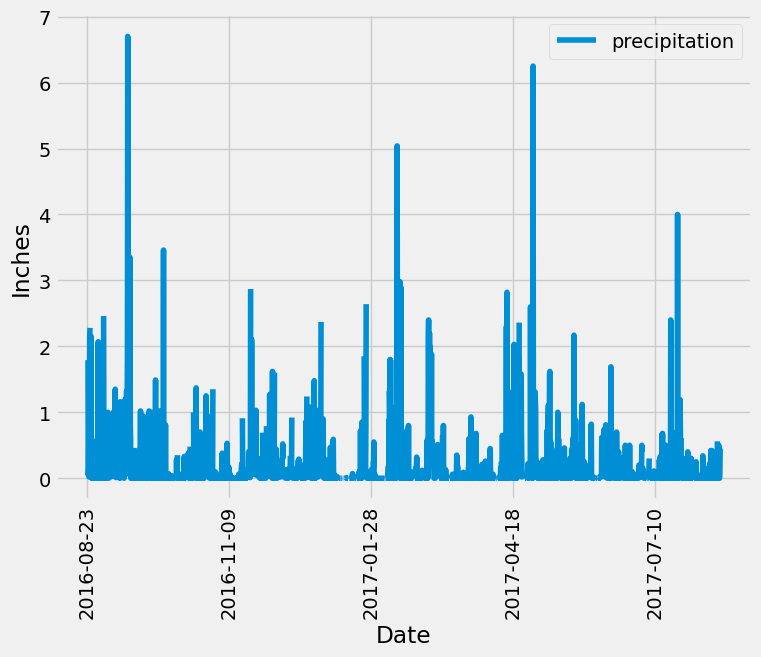

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#the weather girls preformed the song Raining men
# Calculate the date one year from the last date in data set.
one_year_ago= the_latest - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
raining_men= session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= one_year_ago.strftime("%Y-%m-%d"))\
    .all()
   

# Save the query results as a Pandas DataFrame. Explicitly set the column names
the_weather_girls= pd.DataFrame(raining_men, columns=['date', 'prcp'])

# Sort the dataframe by date
the_weather_girls.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
the_weather_girls.set_index('date')['prcp'].plot(figsize=(8,6))
plt.xlabel ('Date')
plt.xticks (rotation=90)
plt.ylabel ('Inches')
plt.legend(['precipitation'])
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
the_weather_girls.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()


9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#Hook and Ladder company 8  is the firehouse featured in Ghostbusters
hook_and_ladder=session.query(measurement.station, func.count(measurement.prcp)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.prcp).desc()).all()
hook_and_ladder

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
hook_and_ladder=hook_and_ladder[0][0]
stay_puft=session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
    ).filter(measurement.station == hook_and_ladder).all()
stay_puft

[(54.0, 85.0, 71.66378066378067)]

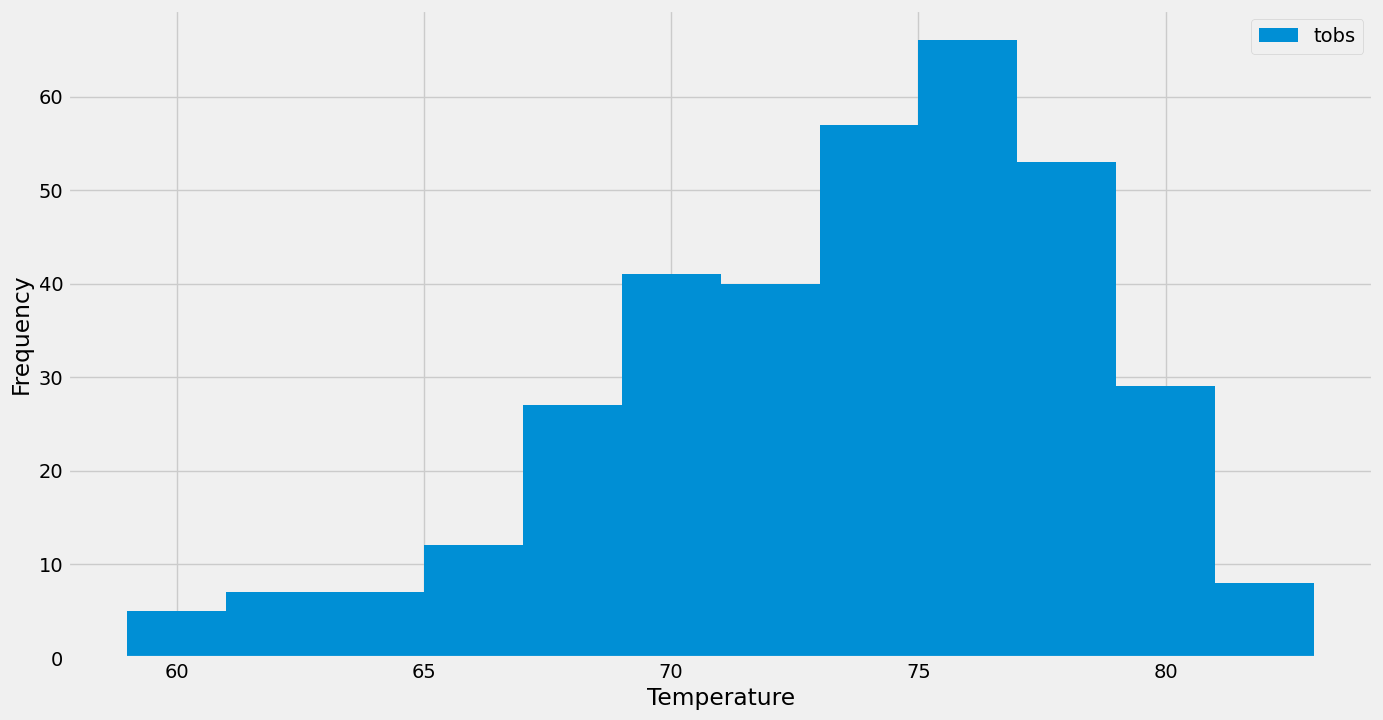

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Ghostbusters came out in 1984 and its raining men in 1983
nineteeneightyfour=session.query(measurement.tobs).\
    filter(measurement.station == hook_and_ladder).\
    filter(measurement.date >= one_year_ago.strftime("%Y-%m-%d")).\
    all()
nineteeneightythree=pd.DataFrame(nineteeneightyfour, columns=['tobs'])

plt.figure(figsize=(15,8))
plt.hist(nineteeneightythree['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

# Close Session

In [17]:
# Close Session
session.close()